In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
 df = pd.read_csv('Raw.csv')

# Data Pre-processing (Entire Dataset)

In [28]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Data Profiling Report")
profile.to_file("All.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 48.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1977 non-null   object
 1   Gender                  1977 non-null   object
 2   University              1977 non-null   object
 3   Department              1977 non-null   object
 4   Academic_Year           1977 non-null   object
 5   CGPA                    1977 non-null   object
 6   Scholarship             1977 non-null   object
 7   Anxious                 1977 non-null   int64 
 8   Worrying                1977 non-null   int64 
 9   Relaxing_Difficulty     1977 non-null   int64 
 10  Annoyed                 1977 non-null   int64 
 11  Excessive_Worry         1977 non-null   int64 
 12  Restless                1977 non-null   int64 
 13  Fearful                 1977 non-null   int64 
 14  Anxiety_Score           1977 non-null   int64 
 15  Anxi

In [5]:
df.head()

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Anxious,Worrying,Relaxing_Difficulty,...,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts,Depression_Score,Depression_Level
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [6]:
df.tail()

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Anxious,Worrying,Relaxing_Difficulty,...,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts,Depression_Score,Depression_Level
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression
1976,23-26,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,2.50 - 2.99,No,1,1,0,...,0,0,0,0,0,0,0,0,0,No Depression


In [7]:
df.shape

(1977, 39)

In [8]:
df.size

77103

In [9]:
df[['Age', 'Gender']].values


array([['18-22', 'Female'],
       ['18-22', 'Male'],
       ['18-22', 'Male'],
       ...,
       ['23-26', 'Female'],
       ['23-26', 'Male'],
       ['23-26', 'Male']], dtype=object)

# Working on Depression (Individually)

In [63]:
# Separate the Independent and Dependent variables
X = df[['Age','Gender','CGPA','Academic_Year','Scholarship', 'No_Interest', 'Hopeless', 'Sleep_Trouble','Low_Energy','Appetite_Changes','Low_Self_Worth', 
'Concentration_Problems','Movement_Changes','Self_Harm_Thoughts']]
y = df['Depression_Level']

In [64]:
X.head()

,Age,Gender,CGPA,Academic_Year,Scholarship,No_Interest,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts
0,18-22,Female,2.50 - 2.99,Fourth Year or Equivalent,No,1,2,1,1,2,1,1,1,1
1,18-22,Male,3.80 - 4.00,First Year or Equivalent,No,1,1,1,1,1,1,1,1,1
2,18-22,Male,3.00 - 3.39,First Year or Equivalent,No,2,0,2,3,2,2,2,2,1
3,18-22,Male,3.40 - 3.79,First Year or Equivalent,No,1,1,1,1,1,1,1,1,1
4,18-22,Male,3.40 - 3.79,First Year or Equivalent,No,1,1,1,1,1,1,1,1,1


In [12]:
y.head()

0             Moderate Depression
1                 Mild Depression
2    Moderately Severe Depression
3                 Mild Depression
4                 Mild Depression
Name: Depression_Level, dtype: object

In [13]:
X.isnull().sum().sum()

0

In [14]:
y.isnull().sum().sum()

0

In [15]:
df['Depression_Level'].value_counts()

Depression_Level
Moderately Severe Depression    495
Severe Depression               488
Moderate Depression             449
Mild Depression                 408
Minimal Depression               93
No Depression                    44
Name: count, dtype: int64

In [16]:
df['Depression_Level'].value_counts().sum()

1977

In [17]:
X.columns

Index(['Age', 'Gender', 'Academic_Year', 'Scholarship', 'No_Interest',
       'Hopeless', 'Sleep_Trouble', 'Low_Energy', 'Appetite_Changes',
       'Low_Self_Worth', 'Concentration_Problems', 'Movement_Changes',
       'Self_Harm_Thoughts'],
      dtype='object')

In [18]:
X.describe()

,No_Interest,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,1.461305,1.787557,1.656550,1.958523,1.503794,1.781993,1.635812,1.426404,1.162367
std,0.956358,1.034030,1.060373,0.975561,1.044608,1.073946,1.029864,1.026359,1.135746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
75%,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [19]:
X.dtypes

Age                       object
Gender                    object
Academic_Year             object
Scholarship               object
No_Interest                int64
Hopeless                   int64
Sleep_Trouble              int64
Low_Energy                 int64
Appetite_Changes           int64
Low_Self_Worth             int64
Concentration_Problems     int64
Movement_Changes           int64
Self_Harm_Thoughts         int64
dtype: object

In [20]:
y.dtypes

dtype('O')

In [21]:
df.dtypes

Age                       object
Gender                    object
University                object
Department                object
Academic_Year             object
CGPA                      object
Scholarship               object
Anxious                    int64
Worrying                   int64
Relaxing_Difficulty        int64
Annoyed                    int64
Excessive_Worry            int64
Restless                   int64
Fearful                    int64
Anxiety_Score              int64
Anxiety_Level             object
Upset                      int64
No_Control                 int64
Stressed                   int64
Overwhelmed                int64
Confident                  int64
Academic_Control           int64
Irritation_Control         int64
Top_Performance            int64
Angered_By_Grades          int64
Piled_Up_Difficulties      int64
Stress_Score               int64
Stress_Level              object
No_Interest                int64
Hopeless                   int64
Sleep_Trou

In [37]:
y.tail()

1972    Moderate Depression
1973        Mild Depression
1974      Severe Depression
1975    Moderate Depression
1976          No Depression
Name: Depression_Level, dtype: object

In [65]:
from ydata_profiling import ProfileReport
import pandas as pd

# Combine independent (X) and dependent (y) variables into one DataFrame
df_xy = pd.concat([X, y], axis=1)



In [7]:
# Create the profiling report
profile = ProfileReport(df_xy, title="Data Profiling Report")

# Export the report to HTML
profile.to_file("depression.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 141.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Convertion categorical to numeric

In [66]:
df_cat = df_xy.select_dtypes(include=[np.dtype('O')])

In [67]:
df_cat

,Age,Gender,CGPA,Academic_Year,Scholarship,Depression_Level
0,18-22,Female,2.50 - 2.99,Fourth Year or Equivalent,No,Moderate Depression
1,18-22,Male,3.80 - 4.00,First Year or Equivalent,No,Mild Depression
2,18-22,Male,3.00 - 3.39,First Year or Equivalent,No,Moderately Severe Depression
3,18-22,Male,3.40 - 3.79,First Year or Equivalent,No,Mild Depression
4,18-22,Male,3.40 - 3.79,First Year or Equivalent,No,Mild Depression
...,...,...,...,...,...,...
1972,23-26,Male,3.40 - 3.79,Fourth Year or Equivalent,No,Moderate Depression
1973,23-26,Female,3.40 - 3.79,Fourth Year or Equivalent,No,Mild Depression
1974,23-26,Female,3.80 - 4.00,Other,No,Severe Depression
1975,23-26,Male,3.00 - 3.39,Fourth Year or Equivalent,No,Moderate Depression


In [68]:
#transforming object data type into integer for Gender
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_xy["Gender"] = encoder.fit_transform(df_xy["Gender"])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Female': 0, 'Male': 1, 'Prefer not to say': 2}


In [69]:
#transforming object data type into integer for Age
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_xy["Age"] = encoder.fit_transform(df_xy["Age"])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'18-22': 0, '23-26': 1, '27-30': 2, 'Above 30': 3, 'Below 18': 4}


In [70]:
#transforming object data type into integer for CGPA
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_xy["CGPA"] = encoder.fit_transform(df_xy["CGPA"])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'2.50 - 2.99': 0, '3.00 - 3.39': 1, '3.40 - 3.79': 2, '3.80 - 4.00': 3, 'Below 2.50': 4, 'Other': 5}


In [71]:
#transforming object data type into integer for Academic_Year
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_xy["Academic_Year"] = encoder.fit_transform(df_xy["Academic_Year"])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'First Year or Equivalent': 0, 'Fourth Year or Equivalent': 1, 'Other': 2, 'Second Year or Equivalent': 3, 'Third Year or Equivalent': 4}


In [72]:
#transforming object data type into integer for Scholarship
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_xy["Scholarship"] = encoder.fit_transform(df_xy["Scholarship"])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'No': 0, 'Yes': 1}


In [73]:
#transforming object data type into integer for Depression_level
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_xy["Depression_Level"] = encoder.fit_transform(df_xy["Depression_Level"])

print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Mild Depression': 0, 'Minimal Depression': 1, 'Moderate Depression': 2, 'Moderately Severe Depression': 3, 'No Depression': 4, 'Severe Depression': 5}


In [21]:
df_xy.dtypes

Age                       int32
Gender                    int32
CGPA                      int32
Academic_Year             int32
Scholarship               int32
No_Interest               int64
Hopeless                  int64
Sleep_Trouble             int64
Low_Energy                int64
Appetite_Changes          int64
Low_Self_Worth            int64
Concentration_Problems    int64
Movement_Changes          int64
Self_Harm_Thoughts        int64
Depression_Level          int32
dtype: object

# Visualization

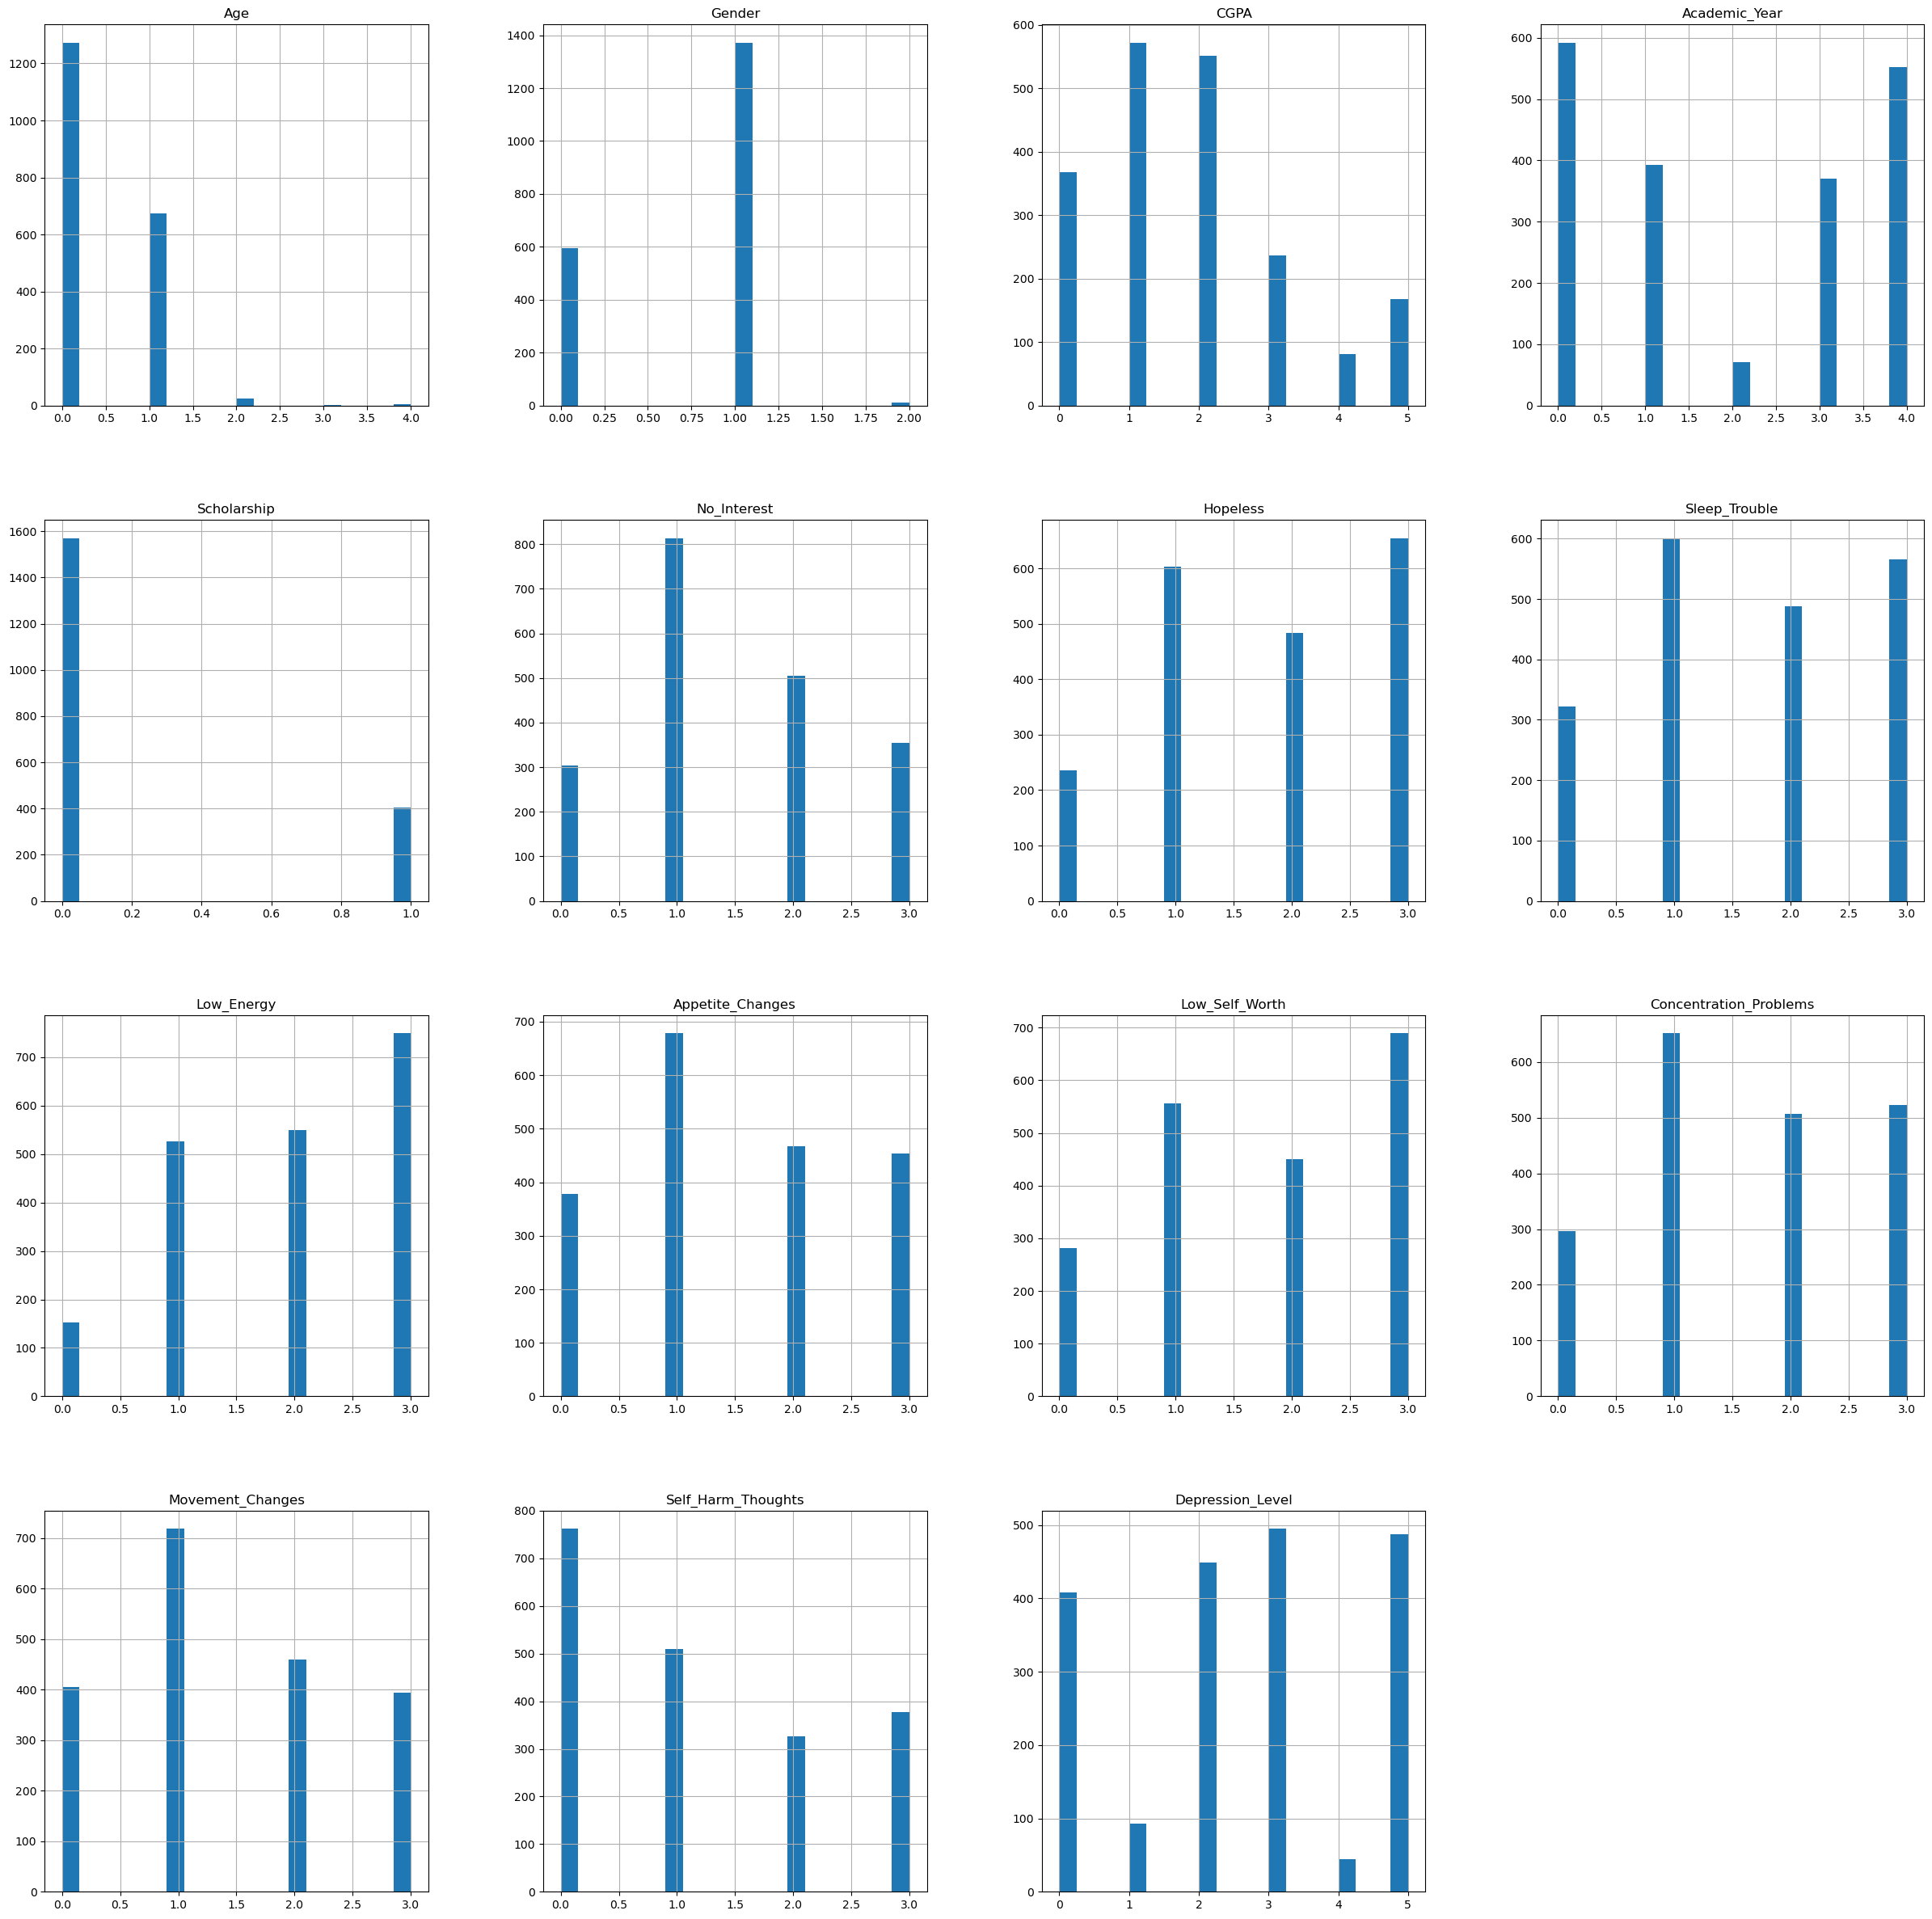

In [21]:
%matplotlib inline
df_xy.hist(bins=20, figsize=(30,30))
plt.show()

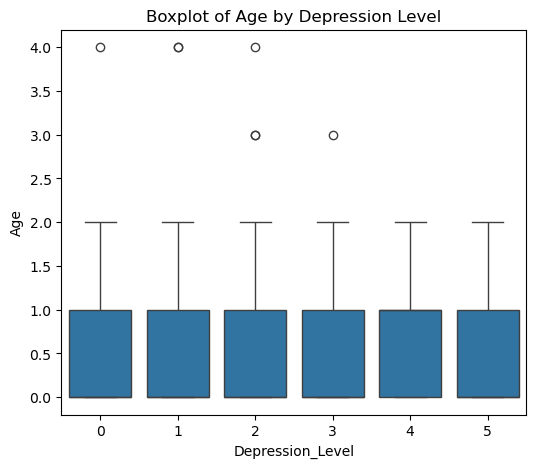

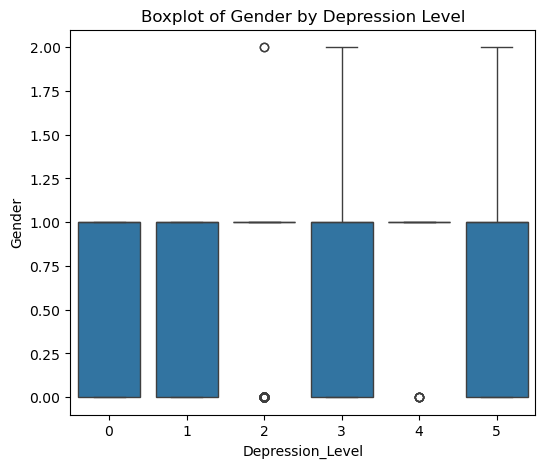

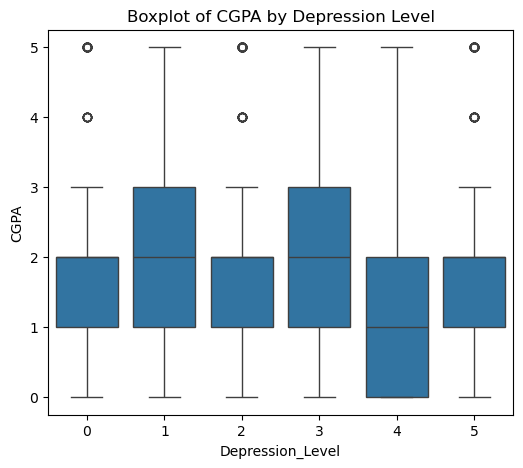

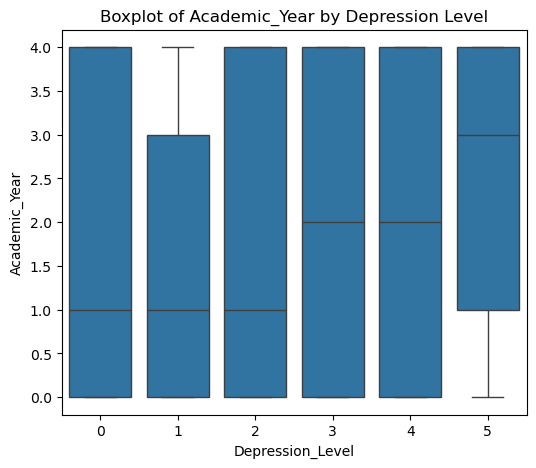

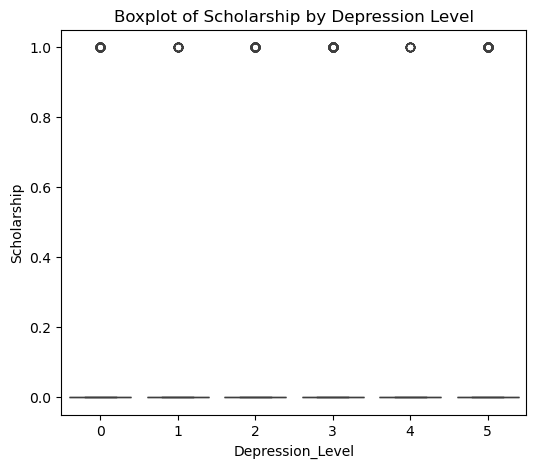

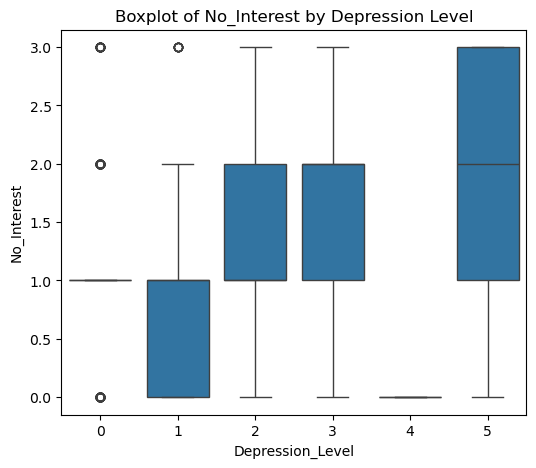

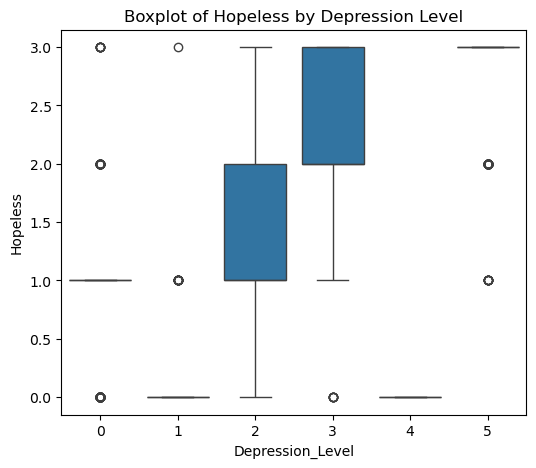

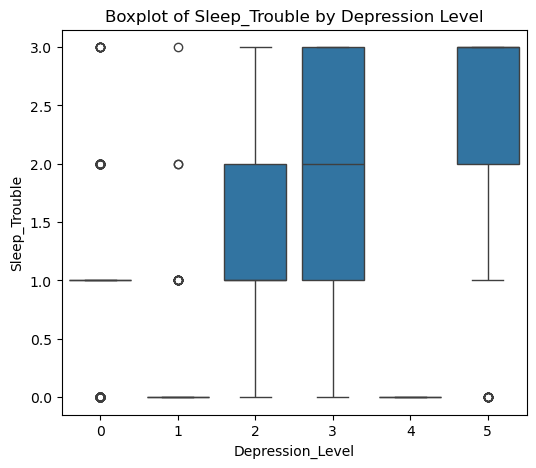

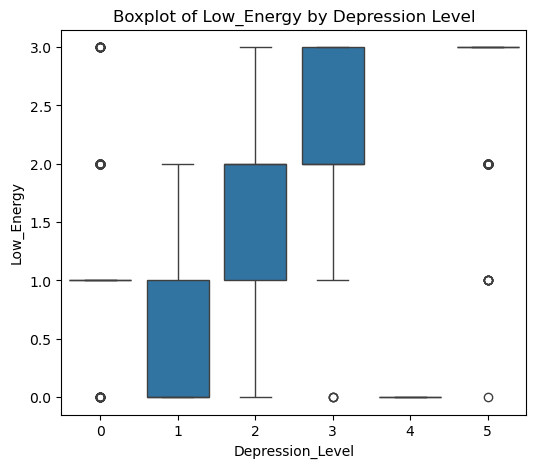

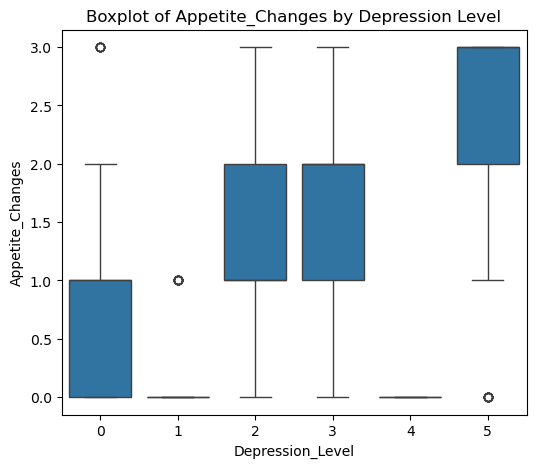

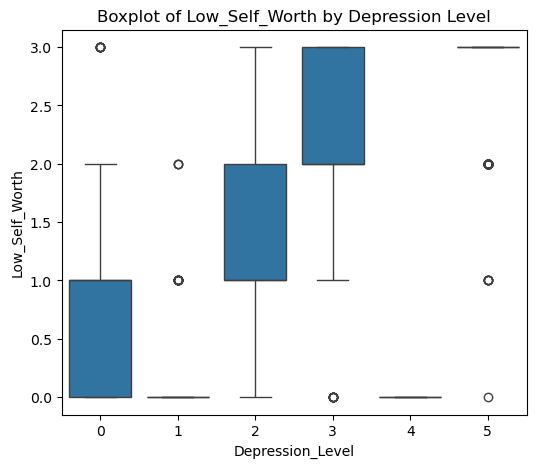

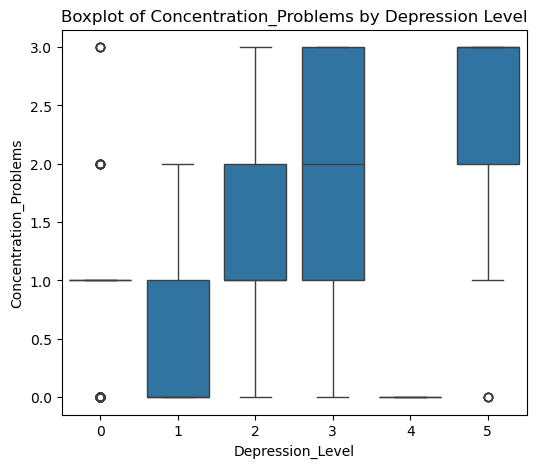

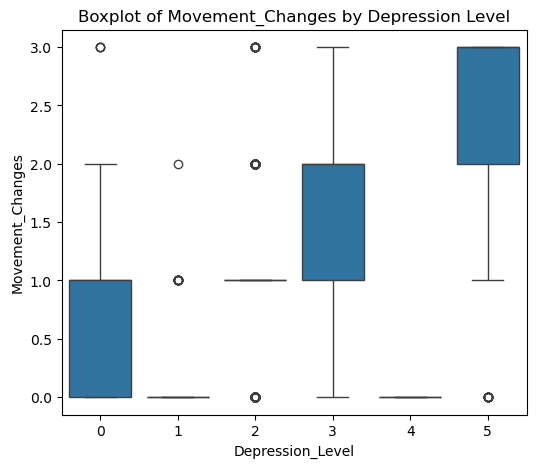

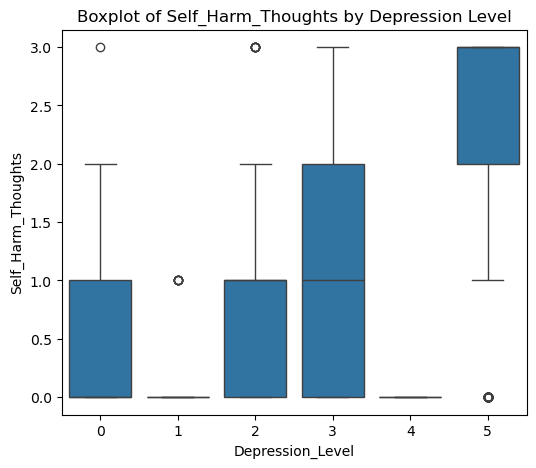

In [96]:


# Target class
target = "Depression_Level"

# Features
features = [
    'Age','Gender','CGPA','Academic_Year','Scholarship',
    'No_Interest','Hopeless','Sleep_Trouble','Low_Energy',
    'Appetite_Changes','Low_Self_Worth','Concentration_Problems',
    'Movement_Changes','Self_Harm_Thoughts'
]



for feature in features:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=target, y=feature, data=df_xy)
    plt.title(f"Boxplot of {feature} by Depression Level")
    plt.savefig(f"boxplot_{feature}.png", dpi=300, bbox_inches="tight")
    plt.show()



# Numerical X and y (without feature scaling)

In [102]:
# Separate the Independent and Dependent variables
X = df_xy[['Age','Gender','CGPA','Academic_Year','Scholarship', 'No_Interest', 'Hopeless', 'Sleep_Trouble','Low_Energy','Appetite_Changes','Low_Self_Worth', 
'Concentration_Problems','Movement_Changes','Self_Harm_Thoughts']]
y = df_xy['Depression_Level']

In [103]:
X.head()

,Age,Gender,CGPA,Academic_Year,Scholarship,No_Interest,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts
0,0,0,0,1,0,1,2,1,1,2,1,1,1,1
1,0,1,3,0,0,1,1,1,1,1,1,1,1,1
2,0,1,1,0,0,2,0,2,3,2,2,2,2,1
3,0,1,2,0,0,1,1,1,1,1,1,1,1,1
4,0,1,2,0,0,1,1,1,1,1,1,1,1,1


# HoldOut Validation Approach - Train-test split

In [104]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [105]:
X_train.head()

,Age,Gender,CGPA,Academic_Year,Scholarship,No_Interest,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts
1273,1,1,3,1,0,1,3,3,2,0,2,0,1,2
1726,0,1,1,3,1,0,3,2,3,3,3,3,1,1
1480,1,1,1,1,0,0,1,0,3,1,0,0,1,1
1798,0,1,1,0,0,2,2,2,2,2,1,1,3,2
769,0,1,1,1,0,0,2,2,1,2,2,2,2,2


# Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['Age','Gender','CGPA','Academic_Year','Scholarship', 'No_Interest', 'Hopeless', 'Sleep_Trouble','Low_Energy','Appetite_Changes','Low_Self_Worth', 
'Concentration_Problems','Movement_Changes','Self_Harm_Thoughts']
mms = MinMaxScaler()
X_train[scaleVars] = mms.fit_transform(X_train[scaleVars])
X_test[scaleVars] = mms.transform(X_test[scaleVars])

In [107]:
X_train.head()

,Age,Gender,CGPA,Academic_Year,Scholarship,No_Interest,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts
1273,0.25,0.5,0.6,0.25,0.0,0.333333,1.000000,1.000000,0.666667,0.000000,0.666667,0.000000,0.333333,0.666667
1726,0.00,0.5,0.2,0.75,1.0,0.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333
1480,0.25,0.5,0.2,0.25,0.0,0.000000,0.333333,0.000000,1.000000,0.333333,0.000000,0.000000,0.333333,0.333333
1798,0.00,0.5,0.2,0.00,0.0,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,1.000000,0.666667
769,0.00,0.5,0.2,0.25,0.0,0.000000,0.666667,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667


In [26]:
X_test.tail()

,Age,Gender,CGPA,Academic_Year,Scholarship,No_Interest,Hopeless,Sleep_Trouble,Low_Energy,Appetite_Changes,Low_Self_Worth,Concentration_Problems,Movement_Changes,Self_Harm_Thoughts
602,0.25,0.5,0.2,1.00,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
372,0.00,0.5,0.0,1.00,1.0,0.333333,0.333333,0.666667,1.000000,0.666667,0.333333,0.333333,0.333333,0.333333
576,0.25,0.0,0.2,0.25,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
211,0.00,0.0,0.0,0.75,0.0,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,1.000000,0.000000
520,0.00,0.0,0.4,1.00,0.0,0.333333,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000


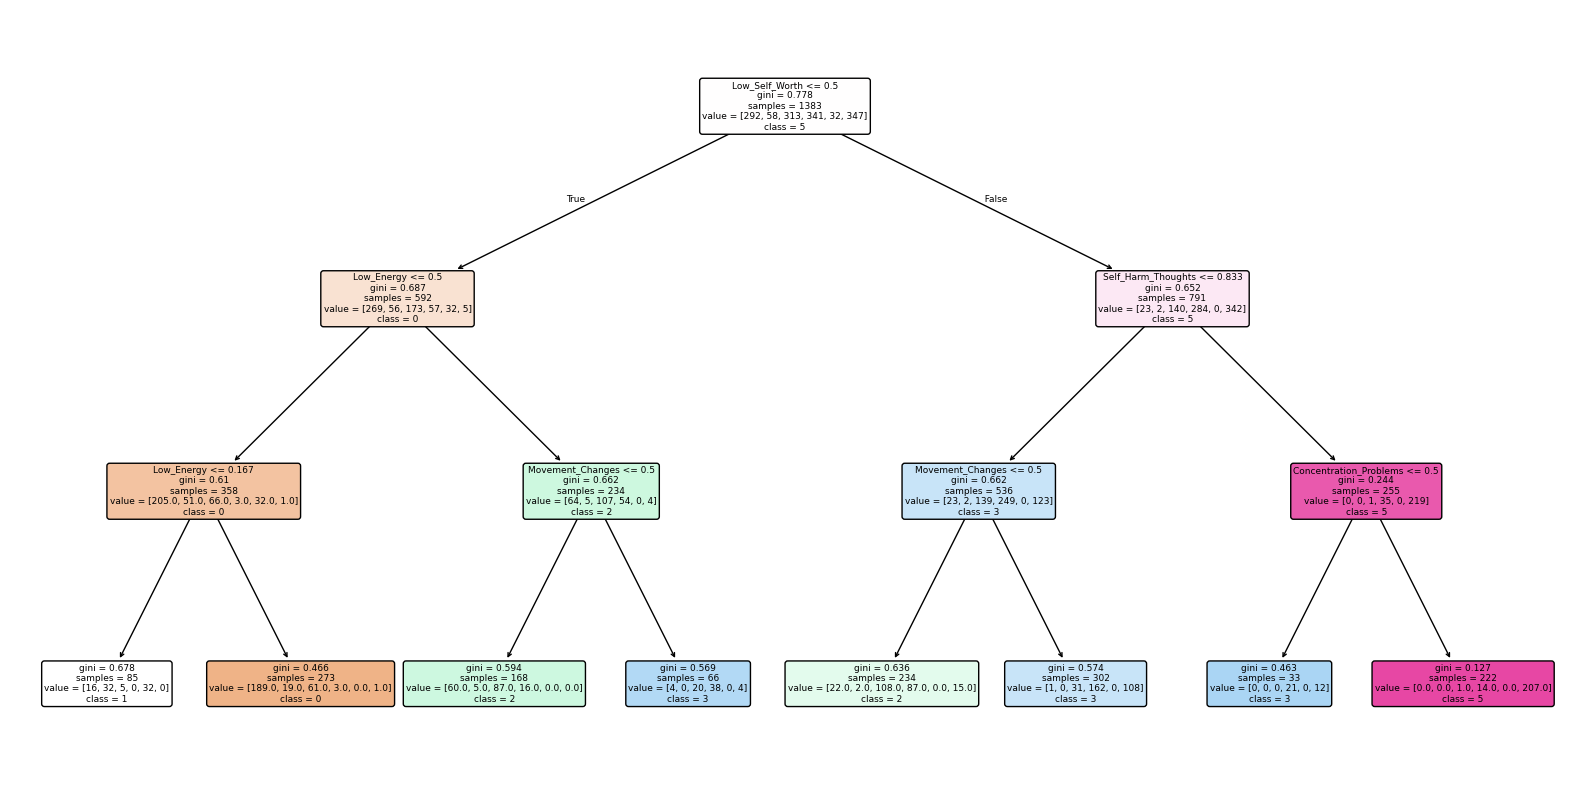

In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Fit Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Class names for depression levels
class_names = [str(i) for i in range(6)]  # ['0', '1', '2', '3', '4', '5']

# --- Plot directly in notebook ---
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.savefig("depression_tree.png", dpi=300, bbox_inches="tight") 
plt.show()  


# Models

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Model train and scores 

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy ", accuracy_score(y_test, y_pred))

Accuracy  0.7811447811447811


## Depression Model Training for Decision Tree Classifier

In [109]:
dep_model = DecisionTreeClassifier()
dep_model.fit(X_train, y_train)
y_pred = dep_model.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.7777777777777778
Depression Model Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.78      0.80      0.79        35
           2       0.71      0.67      0.69       136
           3       0.74      0.73      0.73       154
           4       1.00      1.00      1.00        12
           5       0.86      0.91      0.89       141

    accuracy                           0.78       594
   macro avg       0.81      0.81      0.81       594
weighted avg       0.78      0.78      0.78       594



# Feature importance for Decision tree

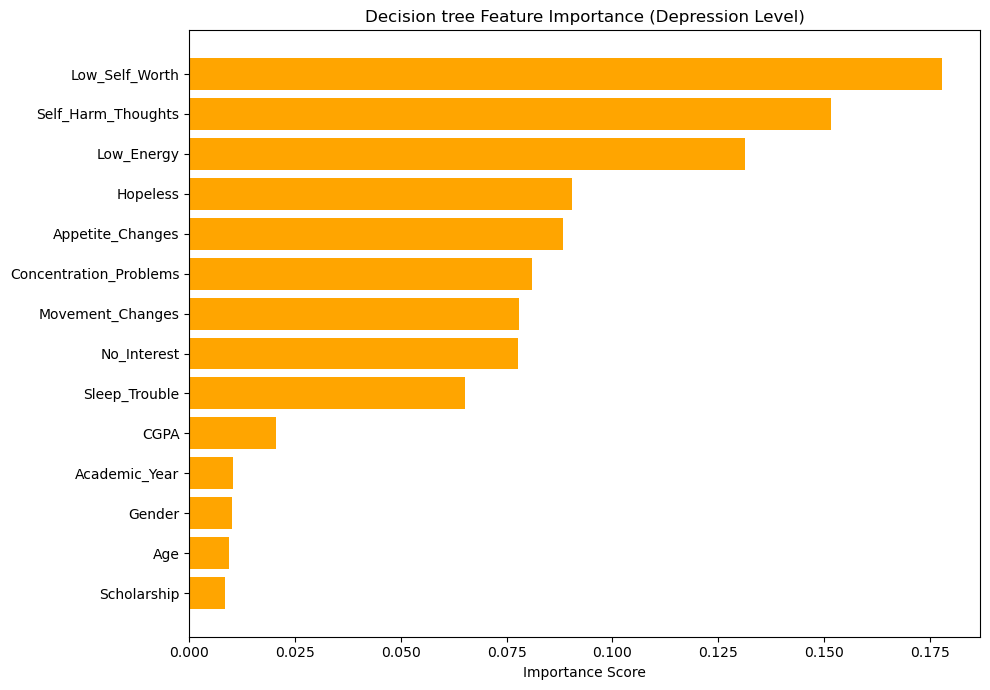

In [110]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="orange")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("Decision tree Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("feature_im_decision_tree.png", dpi=300, bbox_inches="tight") 
plt.show()

# Decision tree Confusion Matrix

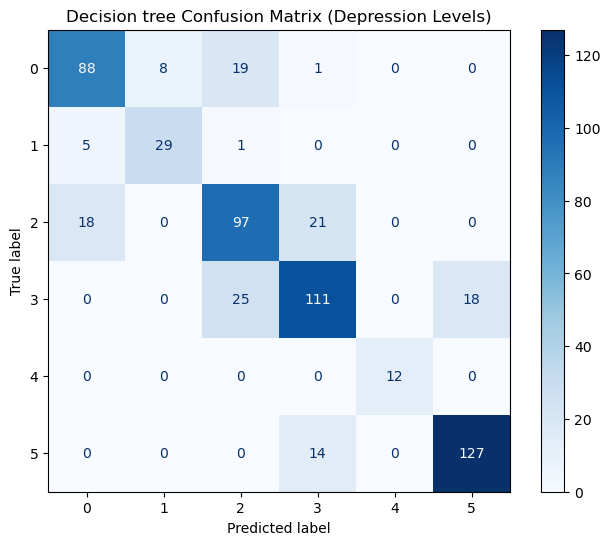

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Decision tree Confusion Matrix (Depression Levels)")
plt.savefig("cm_decisiontree.png", dpi=300, bbox_inches="tight") 
plt.show()


# Depression Model Training for Random Forest Classifier

In [113]:
clf = RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.8400673400673401
Depression Model Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       116
           1       1.00      0.31      0.48        35
           2       0.78      0.82      0.80       136
           3       0.84      0.84      0.84       154
           4       0.75      1.00      0.86        12
           5       0.94      0.96      0.95       141

    accuracy                           0.84       594
   macro avg       0.85      0.80      0.79       594
weighted avg       0.85      0.84      0.83       594



# Feature Importance Random forest

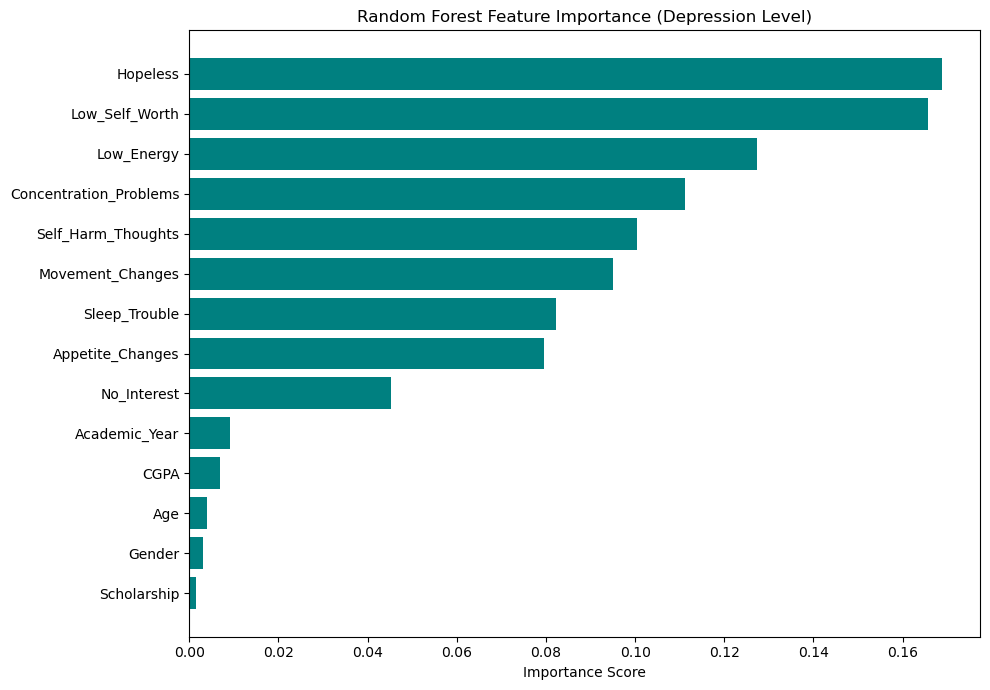

In [114]:

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="teal")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("fi_rdforest.png", dpi=300, bbox_inches="tight") 
plt.show()

# Random Forest Confusion Matrix

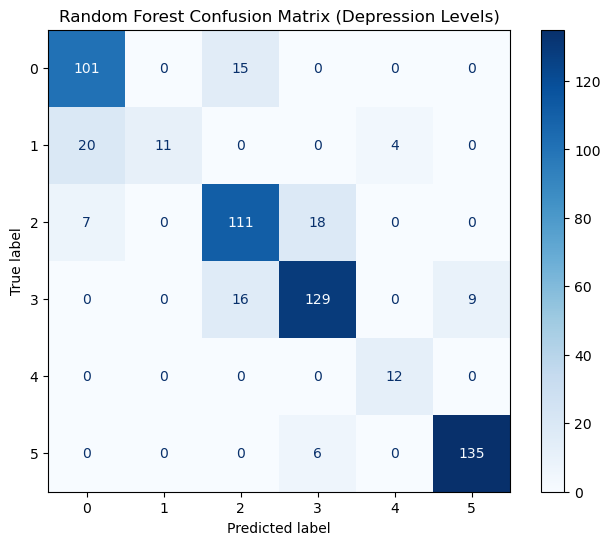

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Random Forest Confusion Matrix (Depression Levels)")
plt.savefig("cm_randomforest.png", dpi=300, bbox_inches="tight") 
plt.show()


# Depression Model Training for Gradient Boosting Classifier

In [117]:

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.8754208754208754
Depression Model Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       116
           1       0.78      0.80      0.79        35
           2       0.82      0.85      0.83       136
           3       0.88      0.86      0.87       154
           4       1.00      1.00      1.00        12
           5       0.96      0.96      0.96       141

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594



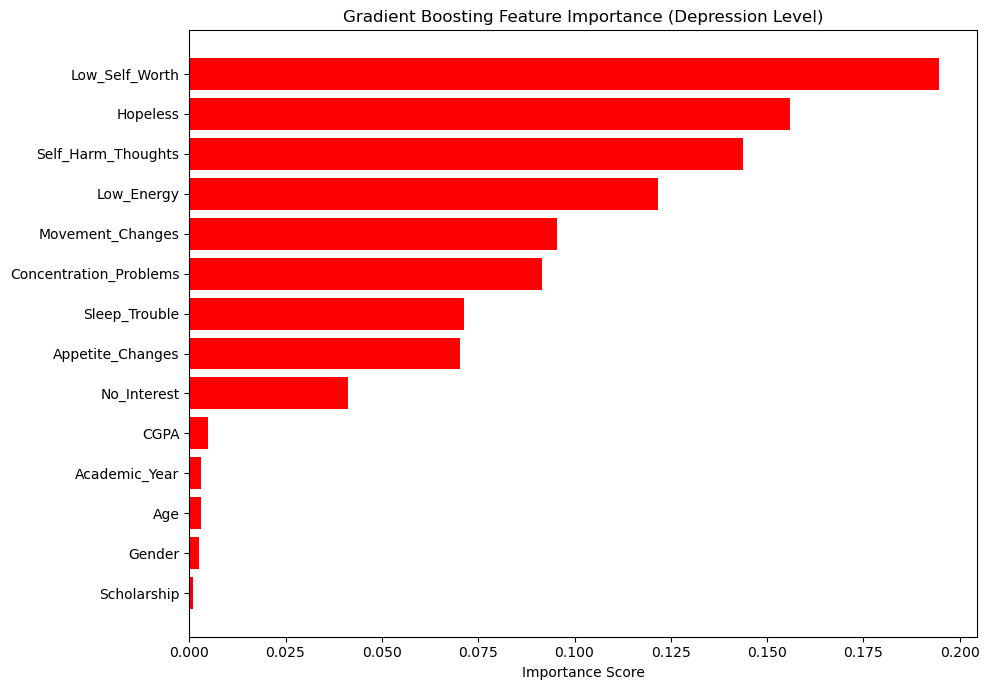

In [118]:

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="red")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("Gradient Boosting Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("fi_gdboosting.png", dpi=300, bbox_inches="tight") 
plt.show()

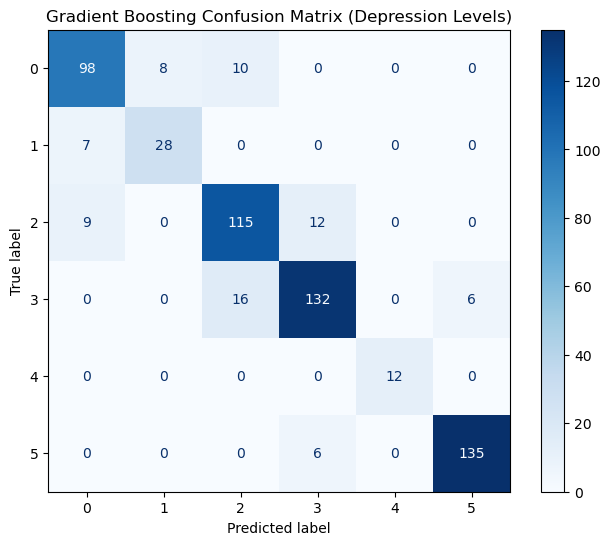

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Gradient Boosting Confusion Matrix (Depression Levels)")
plt.savefig("cm_gdboosting.png", dpi=300, bbox_inches="tight") 
plt.show()


# Depression Model Training for Logistic Regression

In [120]:

clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.9107744107744108
Depression Model Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       116
           1       0.53      0.26      0.35        35
           2       0.97      0.89      0.93       136
           3       0.96      0.99      0.97       154
           4       0.50      0.33      0.40        12
           5       1.00      1.00      1.00       141

    accuracy                           0.91       594
   macro avg       0.79      0.74      0.75       594
weighted avg       0.90      0.91      0.90       594



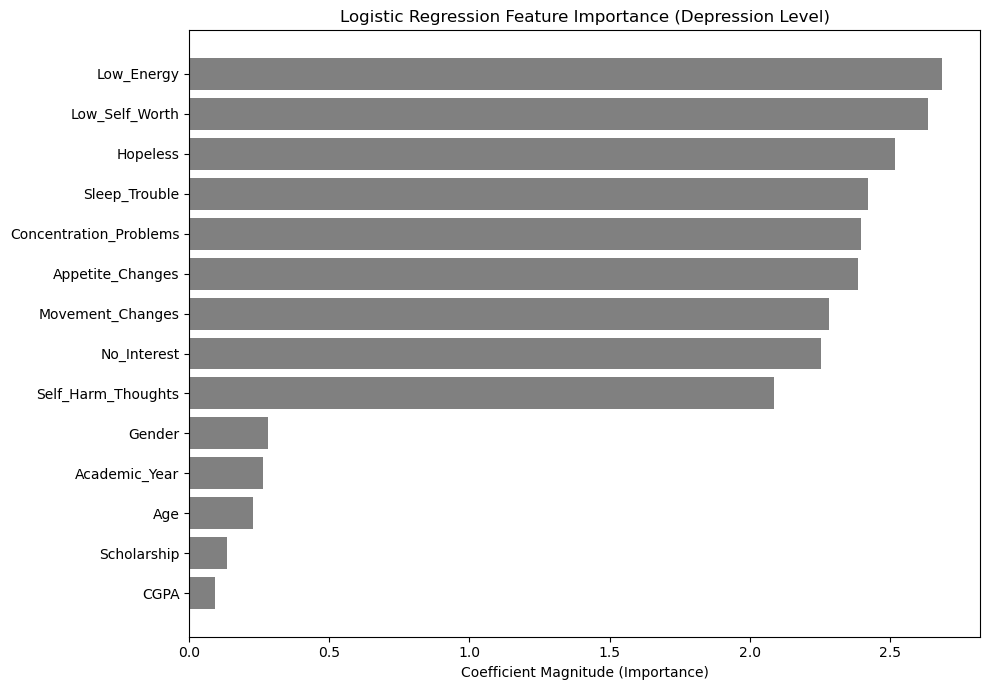

In [122]:
# Get absolute value of coefficients (importance)
importances = np.abs(clf.coef_).mean(axis=0)  # average across classes if multi-class

# Sort features by importance
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="gray")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Coefficient Magnitude (Importance)")
plt.title("Logistic Regression Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("fi_lgreg.png", dpi=300, bbox_inches="tight")
plt.show()

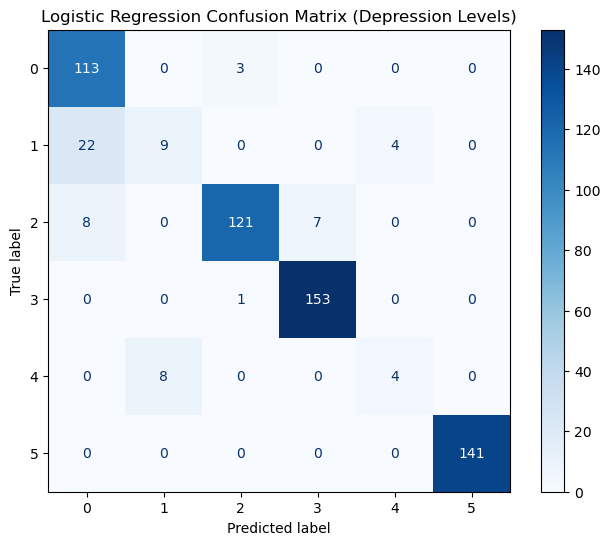

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Logistic Regression Confusion Matrix (Depression Levels)")
plt.savefig("cm_lgreg.png", dpi=300, bbox_inches="tight") 
plt.show()


# Depression Model Training for GaussianNB

In [132]:

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.8417508417508418
Depression Model Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       116
           1       0.90      0.77      0.83        35
           2       0.80      0.73      0.76       136
           3       0.81      0.89      0.85       154
           4       1.00      1.00      1.00        12
           5       0.93      0.91      0.92       141

    accuracy                           0.84       594
   macro avg       0.87      0.86      0.86       594
weighted avg       0.84      0.84      0.84       594



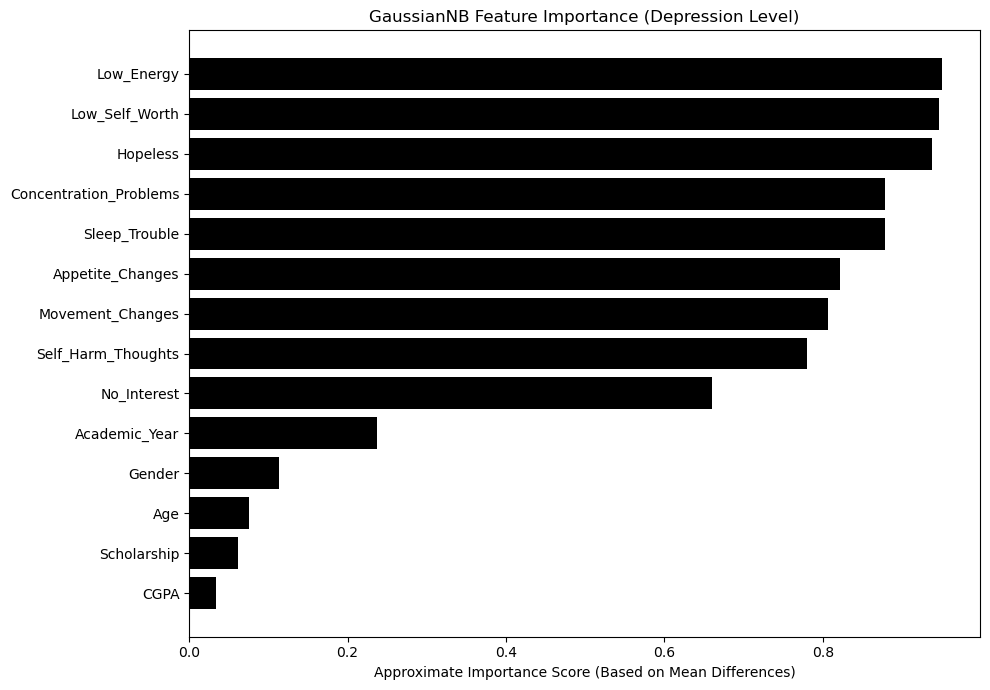

In [133]:
importances = np.ptp(clf.theta_, axis=0)  # peak-to-peak (max - min) across classes
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="black")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Approximate Importance Score (Based on Mean Differences)")
plt.title("GaussianNB Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("fi_gnb.png", dpi=300, bbox_inches="tight")
plt.show()

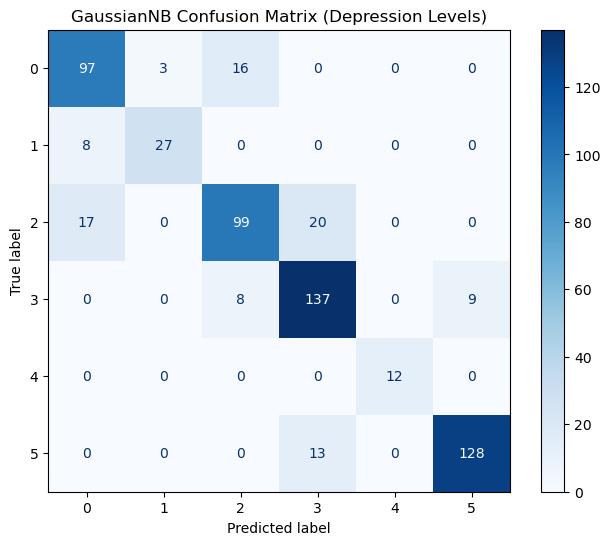

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("GaussianNB Confusion Matrix (Depression Levels)")
plt.savefig("cm_gnb.png", dpi=300, bbox_inches="tight") 
plt.show()


# Depression Model Training for KNN

In [136]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.8198653198653199
Depression Model Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       116
           1       0.86      0.54      0.67        35
           2       0.79      0.67      0.73       136
           3       0.86      0.81      0.83       154
           4       0.69      0.92      0.79        12
           5       0.91      0.96      0.93       141

    accuracy                           0.82       594
   macro avg       0.81      0.80      0.79       594
weighted avg       0.83      0.82      0.82       594



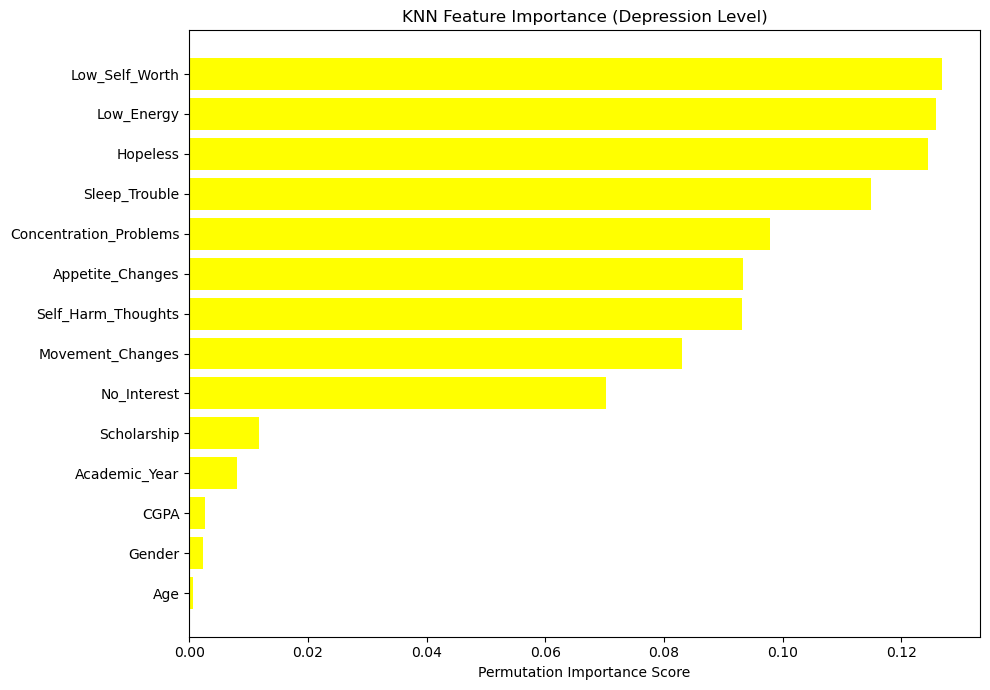

In [137]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
importances = perm_importance.importances_mean
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="yellow")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Permutation Importance Score")
plt.title("KNN Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("fi_knn.png", dpi=300, bbox_inches="tight")
plt.show()

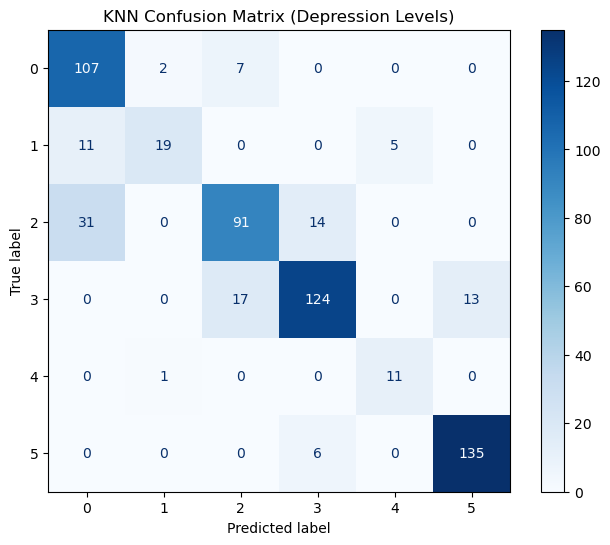

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("KNN Confusion Matrix (Depression Levels)")
plt.savefig("cm_knn.png", dpi=300, bbox_inches="tight") 
plt.show()


# Depression Model Training for SVC

In [140]:
clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Depression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Depression Model Report:\n", classification_report(y_test, y_pred))

Depression Model Accuracy: 0.9461279461279462
Depression Model Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       116
           1       0.92      0.66      0.77        35
           2       0.96      0.94      0.95       136
           3       0.95      0.99      0.97       154
           4       0.73      0.92      0.81        12
           5       1.00      0.97      0.99       141

    accuracy                           0.95       594
   macro avg       0.91      0.91      0.90       594
weighted avg       0.95      0.95      0.95       594



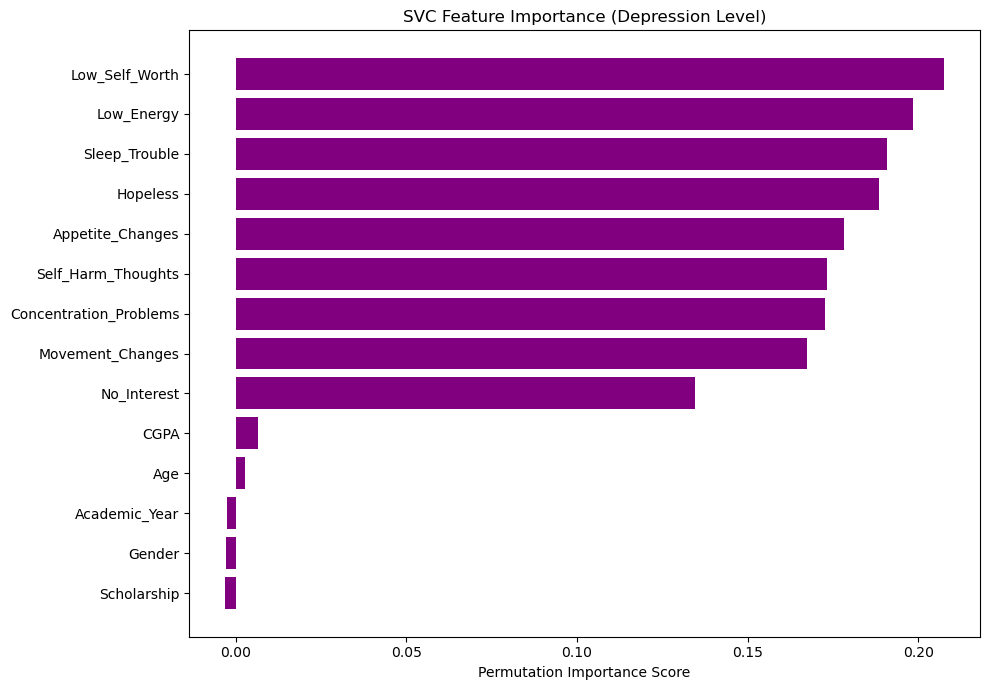

In [141]:
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
importances = perm_importance.importances_mean
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], align="center", color="purple")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Permutation Importance Score")
plt.title("SVC Feature Importance (Depression Level)")
plt.tight_layout()
plt.savefig("fi_svc.png", dpi=300, bbox_inches="tight") 
plt.show()

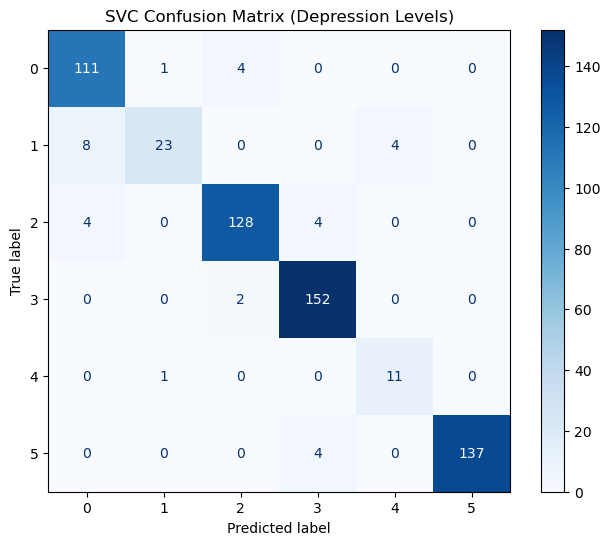

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("SVC Confusion Matrix (Depression Levels)")
plt.savefig("cm_svc.png", dpi=300, bbox_inches="tight") 
plt.show()


# All models with scores

In [34]:
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVC': SVC(kernel='poly', random_state=42),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='macro', zero_division=0)
        recall = recall_score(y_test, predictions, average='macro', zero_division=0)
        f1 = f1_score(y_test, predictions, average='macro', zero_division=0)
        
        results.loc[name] = [accuracy, precision, recall, f1]
    
    return results



In [35]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print("For Depression(Hold-out train-test split):")
print(results_df)

For Depression:
                     Accuracy  Precision    Recall  F1 Score
KNN                  0.819865   0.805639  0.802283  0.791916
Decision Tree        0.772727   0.808300  0.814415  0.811164
Logistic Regression  0.910774   0.790645  0.741304  0.753411
SVC                  0.962963   0.858692  0.833680  0.838817
Random Forest        0.868687   0.886721  0.882212  0.884219
Gradient Boosting    0.875421   0.881746  0.884168  0.882850
Naive Bayes          0.841751   0.873358  0.855498  0.862819


# Stratified Train Test Split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0, stratify = y)


# Feature Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['Age','Gender','CGPA','Academic_Year','Scholarship', 'No_Interest', 'Hopeless', 'Sleep_Trouble','Low_Energy','Appetite_Changes','Low_Self_Worth', 
'Concentration_Problems','Movement_Changes','Self_Harm_Thoughts']
mms = MinMaxScaler()
X_train[scaleVars] = mms.fit_transform(X_train[scaleVars])
X_test[scaleVars] = mms.transform(X_test[scaleVars])

# Model train and scores 

In [97]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy ", accuracy_score(y_test, y_pred))
print(y_train.value_counts())

Accuracy  0.7508417508417509
Depression_Level
3    346
5    341
2    314
0    286
1     65
4     31
Name: count, dtype: int64


# K Fold Cross Validation

In [142]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Model train and scores 

In [144]:
clf = DecisionTreeClassifier()

results = cross_val_score(clf, X, y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.74747475 0.78282828 0.7020202  0.84848485 0.75252525 0.72222222
 0.77777778 0.76142132 0.78172589 0.72588832]

Results =  0.7602368866328257 +/- 0.03912211543346555


# All models with scores

In [145]:
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVC': SVC(kernel='poly', random_state=42),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='macro', zero_division=0)
        recall = recall_score(y_test, predictions, average='macro', zero_division=0)
        f1 = f1_score(y_test, predictions, average='macro', zero_division=0)
        
        results.loc[name] = [accuracy, precision, recall, f1]
    
    return results

In [146]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print("For Depression(K-fold cross validation):")
print(results_df)

For Depression(K-fold cross validation):
                     Accuracy  Precision    Recall  F1 Score
KNN                  0.819865   0.805639  0.802283  0.791916
Decision Tree        0.776094   0.811441  0.817016  0.813660
Logistic Regression  0.910774   0.790645  0.741304  0.753411
SVC                  0.962963   0.858692  0.833680  0.838817
Random Forest        0.856902   0.882576  0.874497  0.878329
Gradient Boosting    0.875421   0.881746  0.884168  0.882850
Naive Bayes          0.841751   0.873358  0.855498  0.862819


# Stratified K Fold Cross Validation

In [150]:
# For imbalance dataset
from sklearn.model_selection import StratifiedKFold,cross_validate
skfold = StratifiedKFold(n_splits=15,shuffle=True, random_state=42)


# Model train and scores 

In [151]:
clf = DecisionTreeClassifier()
results = cross_val_score(clf, X, y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.78030303 0.79545455 0.74242424 0.70454545 0.76515152 0.79545455
 0.79545455 0.79545455 0.85606061 0.73484848 0.78030303 0.73484848
 0.80152672 0.77099237 0.77862595]

Results =  0.775429871231398 +/- 0.03500193076516328


In [ ]:
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVC': SVC(kernel='poly', random_state=42),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='macro', zero_division=0)
        recall = recall_score(y_test, predictions, average='macro', zero_division=0)
        f1 = f1_score(y_test, predictions, average='macro', zero_division=0)
        
        results.loc[name] = [accuracy, precision, recall, f1]
    
    return results

In [153]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print("For Depression(Stratified K-fold cross validation):")
print(results_df)

For Depression(Stratified K-fold cross validation):
                     Accuracy  Precision    Recall  F1 Score
KNN                  0.819865   0.805639  0.802283  0.791916
Decision Tree        0.767677   0.801039  0.810826  0.805585
Logistic Regression  0.910774   0.790645  0.741304  0.753411
SVC                  0.962963   0.858692  0.833680  0.838817
Random Forest        0.890572   0.917319  0.899547  0.907449
Gradient Boosting    0.875421   0.881746  0.884168  0.882850
Naive Bayes          0.841751   0.873358  0.855498  0.862819
